# 3.2 Activity

Our **Unit 3** activities will use data from the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, on the fuel economy of 2023 vehicles.

To complete this activity, you will: 

1. Conduct exploratory data analysis.

2. Build an OLS regression model.

3. Check model assumptions.

4. Provide a summary statement or interpretation of the model relative to its ability to make accurate predictions.

**Acknowledgements**

This information was provided by the U.S. Environmental Protection Agency,
Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory,
2000 Traverwood, Ann Arbor, MI 48105 (734-214-4200) and obtained from https://www.fueleconomy.gov.

## Data Dictionary

|variable | description |
|:---------------------|:-----------|
|Model Year|Year used to designate discrete vehicle model.|
|Division|Automobile manufacturer|
|Carline|Model name|
|Verify Mfr Cd|Manufacturer code|
|City|Estimated city mpg (miles/gallon)|
|Hwy|Estimated highway mpg (miles/gallon)|
|Combined|Estimated combined mpg (miles/gallon)|
|Eng Displ|Engine displacement in liters|
|# Cyl|Number of engine cylinders|
|Fuel Usage|Fuel type used|
|Guzzler?|High fuel consumption indicator|
|Air Aspir Method|Engine and Motor Descriptors|
|Trans|Transmission Descriptors|
|# Gears|Number of transmission gears|
|Lockup Torque Converter|Indicator if has a clutch|
|Trans Creeper Gear|Indicator if has a creeper gear|
|Drive Sys|Drive axel type|
|Intake Valves Per Cyl|Number of intake valves per engine cylinder|
|Exhaust Valves Per Cyl|Number of exhaust valves per engine cylinder|
|Carline Class|Vehicle size class|
|Release Date|Date of initial release|

*Note: Some columns have been dropped to simplify the dataset.*

**See also:**

- *https://www.fueleconomy.gov/feg/pdfs/guides/FEG2023.pdf*
- *https://www.fueleconomy.gov/feg/findacarhelp.shtml*

## Part 1: Workspace Setup

**Tasks**

- Run the cell below to download the 2023 EPA Fuel Economy dataset.
- Import necessary libraries to perform exploratory data analysis and data wrangling.
- Import statsmodels to test and build regression models.
- Read in the data file to a variable called `cars`. 
- Return the first few rows of the resulting DataFrame to ensure it has loaded correctly.

In [2]:
# Download data (2023-Fuel_Economy.csv)
!gdown 1NXX4zYClHK7xgxI-Ir58UXcSmTi82GDw

Downloading...
From: https://drive.google.com/uc?id=1NXX4zYClHK7xgxI-Ir58UXcSmTi82GDw
To: /content/2023-Fuel_Economy.csv
100% 89.8k/89.8k [00:00<00:00, 49.2MB/s]


In [26]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')
#importing libraries for reading data and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing statsmodels to make our model later on
import statsmodels as sms 
import statsmodels.api as smapi
import statsmodels.formula.api as smf
import statsmodels.stats as stats

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#reading in the dataset to "cars"
cars = pd.read_csv('/content/2023-Fuel_Economy.csv')
#returning the first few lines of the data frame
cars.head() #looks good

,Model Year,Division,Carline,Verify Mfr Cd,City,Hwy,Combined,Eng Displ,# Cyl,Fuel Usage,...,Air Aspir Method,Trans,# Gears,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Carline Class,Release Date
0,2023,Aston Martin Lagonda Ltd,V12 Vantage,ASX,14,22,16,5.2,12,GP,...,TC,A,8,Y,N,R,2,2,1,6/29/2022
1,2023,Aston Martin Lagonda Ltd,Vantage V8,ASX,18,24,20,4.0,8,GP,...,TC,A,8,Y,N,R,2,2,1,4/29/2022
2,2023,Audi,R8 Coupe quattro,VGA,13,18,15,5.2,10,GPR,...,NaN,AMS,7,N,N,A,2,2,1,7/29/2022
3,2023,Audi,R8 Coupe RWD,VGA,14,23,17,5.2,10,GPR,...,NaN,AMS,7,N,N,R,2,2,1,7/29/2022
4,2023,Audi,R8 GT RWD,VGA,14,21,17,5.2,10,GPR,...,NaN,AMS,7,N,N,R,2,2,1,10/21/2022


## Part 2: Exploratory Data Analysis & Data Wrangling

Conduct preliminary exploratory data analysis steps on the dataset by creating a new DataFrame called `fuel_economy` with the following features:

```
["City", "Hwy", "Combined", "Eng Displ", "Trans", "# Cyl", "Fuel Usage", "# Gears", "Drive Sys", "Intake Valves Per Cyl", "Exhaust Valves Per Cyl"]
```

**Tasks**

- View the shape of the DataFrame.
- Get information on the data types contained within the DataFrame.
- Find and fill null/missing values as you see fit.
- Find and drop duplicate entries.

Refer back to **Unit 2** if you get stuck.

In [5]:
#creating a subset for further anaylysis
cars_sub = cars[["City", "Hwy", "Combined", "Eng Displ", "Trans", "# Cyl", "Fuel Usage", "# Gears", "Drive Sys", "Intake Valves Per Cyl", "Exhaust Valves Per Cyl"]]
#let's double check this went the way we hoped
cars_sub.head() #nice

,City,Hwy,Combined,Eng Displ,Trans,# Cyl,Fuel Usage,# Gears,Drive Sys,Intake Valves Per Cyl,Exhaust Valves Per Cyl
0,14,22,16,5.2,A,12,GP,8,R,2,2
1,18,24,20,4.0,A,8,GP,8,R,2,2
2,13,18,15,5.2,AMS,10,GPR,7,A,2,2
3,14,23,17,5.2,AMS,10,GPR,7,R,2,2
4,14,21,17,5.2,AMS,10,GPR,7,R,2,2


In [6]:
#shape of the dataframe
cars_sub.shape
#(1100, 11) so 11 variables/ columns over 1100 rows

(1100, 11)

In [7]:
#info on the data types
cars_sub.info()
#we have mostly int64 types, 3 objects, and a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    1100 non-null   int64  
 1   Hwy                     1100 non-null   int64  
 2   Combined                1100 non-null   int64  
 3   Eng Displ               1100 non-null   float64
 4   Trans                   1100 non-null   object 
 5   # Cyl                   1100 non-null   int64  
 6   Fuel Usage              1100 non-null   object 
 7   # Gears                 1100 non-null   int64  
 8   Drive Sys               1100 non-null   object 
 9   Intake Valves Per Cyl   1100 non-null   int64  
 10  Exhaust Valves Per Cyl  1100 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 94.7+ KB


In [8]:
#look for n/a's
cars_sub.isna().sum() #no missing values. This agrees with what we saw in info
cars_sub.isnull().sum() #none in this either

City                      0
Hwy                       0
Combined                  0
Eng Displ                 0
Trans                     0
# Cyl                     0
Fuel Usage                0
# Gears                   0
Drive Sys                 0
Intake Valves Per Cyl     0
Exhaust Valves Per Cyl    0
dtype: int64

In [10]:
#duplicates and remediation
cars_sub.duplicated().sum() #here we have 276 duplicates
cars_sub.drop_duplicates()

,City,Hwy,Combined,Eng Displ,Trans,# Cyl,Fuel Usage,# Gears,Drive Sys,Intake Valves Per Cyl,Exhaust Valves Per Cyl
0,14,22,16,5.2,A,12,GP,8,R,2,2
1,18,24,20,4.0,A,8,GP,8,R,2,2
2,13,18,15,5.2,AMS,10,GPR,7,A,2,2
3,14,23,17,5.2,AMS,10,GPR,7,R,2,2
4,14,21,17,5.2,AMS,10,GPR,7,R,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1095,10,12,11,4.0,A,8,GPR,9,4,2,2
1096,14,18,16,4.0,AMS,6,GPR,7,R,2,2
1097,12,20,14,6.0,A,12,GPR,9,A,2,1
1098,20,25,22,2.7,A,4,G,8,R,2,2


**For all columns in your new DataFrame:**

- Display summary statistics using `describe(include='all')` and feature correlation with `corr()`.
- Create univariate plots with Matplotlib or Seaborn to visualize data distributions.
- Create biviarate plots to visualize relationships with respect to the `Combined` fuel economy values.

In [11]:
#summary statistics
cars_sub.describe(include='all')

,City,Hwy,Combined,Eng Displ,Trans,# Cyl,Fuel Usage,# Gears,Drive Sys,Intake Valves Per Cyl,Exhaust Valves Per Cyl
count,1100.000000,1100.000000,1100.000000,1100.000000,1100,1100.000000,1100,1100.000000,1100,1100.000000,1100.000000
unique,NaN,NaN,NaN,NaN,7,NaN,5,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,SA,NaN,G,NaN,A,NaN,NaN
freq,NaN,NaN,NaN,NaN,468,NaN,484,NaN,423,NaN,NaN
mean,20.758182,26.834545,23.040909,3.123909,NaN,5.610909,NaN,7.809091,NaN,1.922727,1.921818
std,6.653498,6.424468,6.439129,1.305354,NaN,1.902890,NaN,1.884255,NaN,0.286855,0.288191
min,8.000000,11.000000,9.000000,1.200000,NaN,3.000000,NaN,1.000000,NaN,1.000000,1.000000
25%,16.000000,22.000000,19.000000,2.000000,NaN,4.000000,NaN,7.000000,NaN,2.000000,2.000000
50%,20.000000,26.000000,22.000000,3.000000,NaN,6.000000,NaN,8.000000,NaN,2.000000,2.000000
75%,23.000000,31.000000,26.000000,3.600000,NaN,6.000000,NaN,9.000000,NaN,2.000000,2.000000


In [12]:
#correlation
cars_sub.corr()

,City,Hwy,Combined,Eng Displ,# Cyl,# Gears,Intake Valves Per Cyl,Exhaust Valves Per Cyl
City,1.000000,0.907253,0.985807,-0.640779,-0.641103,-0.536926,0.243355,0.246382
Hwy,0.907253,1.000000,0.960695,-0.674561,-0.668224,-0.495254,0.276960,0.279035
Combined,0.985807,0.960695,1.000000,-0.673905,-0.672248,-0.531374,0.263295,0.266507
Eng Displ,-0.640779,-0.674561,-0.673905,1.000000,0.917533,0.299439,-0.568063,-0.572386
# Cyl,-0.641103,-0.668224,-0.672248,0.917533,1.000000,0.275673,-0.338515,-0.347547
# Gears,-0.536926,-0.495254,-0.531374,0.299439,0.275673,1.000000,-0.192296,-0.193400
Intake Valves Per Cyl,0.243355,0.276960,0.263295,-0.568063,-0.338515,-0.192296,1.000000,0.994512
Exhaust Valves Per Cyl,0.246382,0.279035,0.266507,-0.572386,-0.347547,-0.193400,0.994512,1.000000


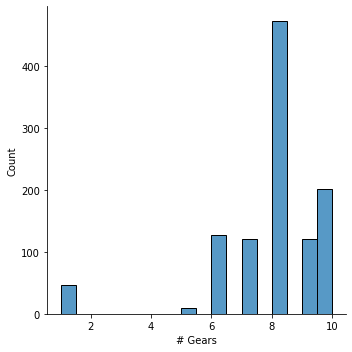

In [50]:
#let's make visuals with seaborn
import seaborn as sns
sns.displot(cars_sub, x="# Gears", binwidth=0.5) #this distribution is interesting, most around 8 and then scattered amounts elsewhere

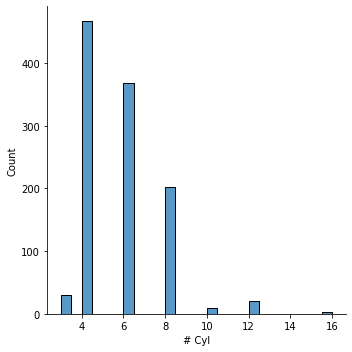

In [51]:
sns.displot(cars_sub, x="# Cyl", binwidth=0.5) #unimodal dist, with most around 4 and 6

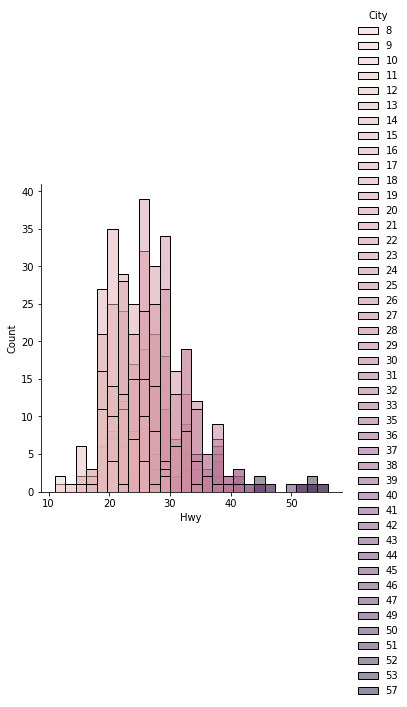

In [18]:
sns.displot(cars_sub, x="Hwy", hue="City") #pretty plot color but not very helpful
#Hwy distribution looks somewhat normal around mean 26.83

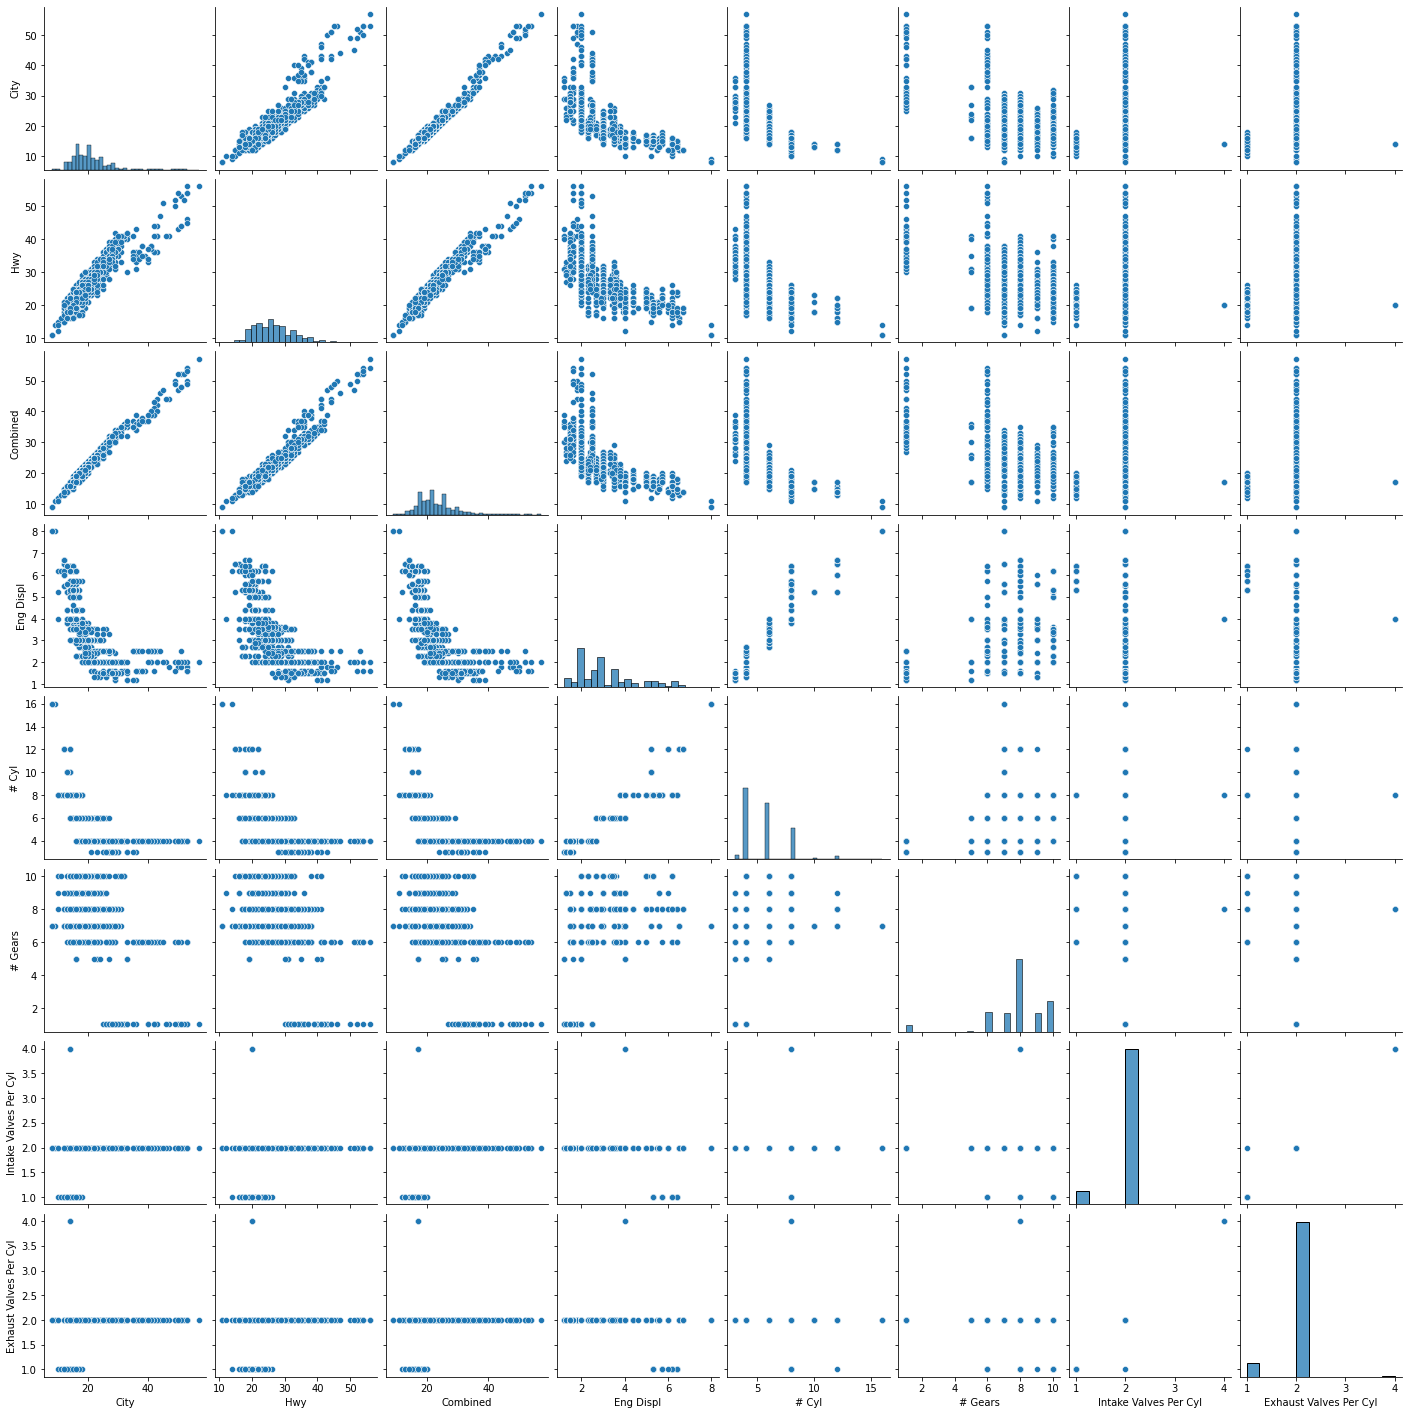

In [52]:
sns.pairplot(data = cars_sub)
#here we can see some interesting relationships between City*Hwy, City*Combined,and  Hwy*Combined

<Axes: >

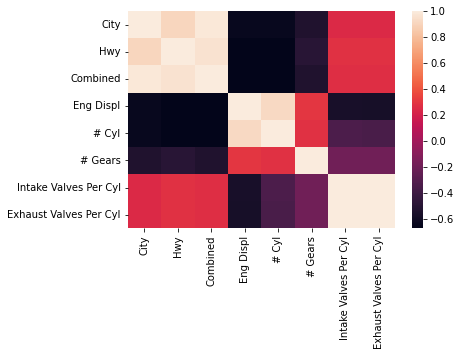

In [53]:
sns.heatmap(data = cars_sub.corr())
#we can see that there are a handful of positively and negatively correlated relationships
#City, Hwy, and Combined are all strongly correlated like we found above

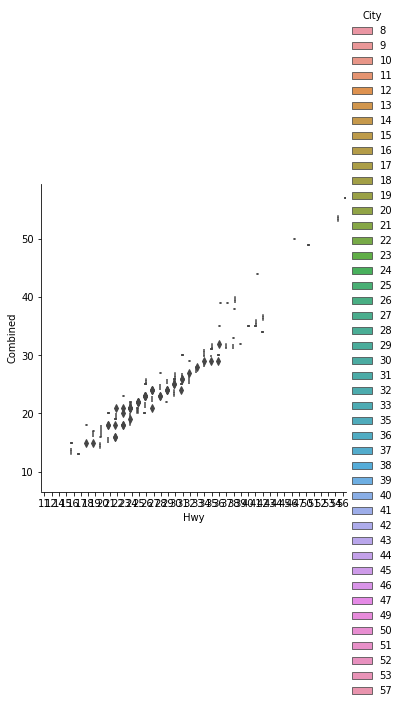

In [22]:
sns.catplot(data=cars_sub, x="Hwy", y="Combined", hue="City", kind="box")

**Describe the nature of the data**

*Based on your observations, what might you expect about any significant relationships?  Would you anticipate any multicolinarity problems?*

We can definitely expect some influence of multicolinearity between the 'City', 'Hwy', and 'Combined' variables, as they are all strongly positively correlated. All three of the aforementioned variables are strongly negatively correlated with 'Eng displ' and '# Cyl'. 'Intake Valves Per Cyl' and 'Exhaust Valves Per Cyl' are also strongly correlated.

## Part 3: Model Building

Using [Statsmodels](https://www.statsmodels.org), build an Ordinary Least Squares (OLS) regression model with `Eng Displ`, `Trans`, `# Cyl`, and `# Gears` as your predictors and `Combined` mpg as your response.

You may use [smapi](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) or [smf](https://www.statsmodels.org/stable/example_formulas.html) to build your model; save this to a variable called `model`.

*smapi:* 

```
model = smapi.OLS(y, x)
```

*smf:*
  
```
model = statsmodels.formula.api.ols(formula=...)
```

  *To reference variables with spaces in their names in smf, you must wrap the column name in Q() for "quoted" values. Ex: Q("Eng Displ").*

In [33]:
model = smf.ols(formula = 'Combined ~ Q("Eng Displ") + Trans + Q("# Cyl") + Q("# Gears")', data = cars_sub)

Run `fit()` on your `model` and display the model fit results with `summary()`.

In [35]:
Fit_model = model.fit()
Fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Combined   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          2.85e-247
Time:                        01:59:01   Log-Likelihood:                -3017.7
No. Observations:                1100   AIC:                             6055.
Df Residuals:                    1090   BIC:                             6106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.3327      1.060     37.117      0.000      37.253      41.412
Trans[T.AM]       -0.3207      0.843     -0.380      0.704      -1.976       1.334
Trans[T.AMS]       0.9145      0.453      2.020      0.044       0.026       1.803
Trans[T.CVT]       5.0180      1.079      4.650      0.000       2.900       7.136
Trans[T.M]        -2.6991      0.565     -4.779      0.000      -3.807      -1.591
Trans[T.SA]       -0.1228      0.296     -0.414      0.679      -0.705       0.459
Trans[T.SCV]       5.0706      0.539      9.416      0.000       4.014       6.127
Q("Eng Displ")    -1.1768      0.228     -5.170      0.000      -1.623      -0.730
Q("# Cyl")        -1.0677      0.156     -6.866      0.000      -1.373      -0.763
Q("# Gears")      -0.8998      0.111     -8.100      0.000      -1.118      -0.682
==============================================================================
Omnibus:                      467.191   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.374
Skew:                           1.733   Prob(JB):                         0.00
Kurtosis:                      11.665   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Assumption Checking

Before we can come to conclusions, we must first check to see if the model meets its assumptions.

*Excerpt from [STAT 501: 7.3 - MLR Model Assumptions](https://online.stat.psu.edu/stat501/lesson/7/7.3):*

> The four conditions ("**LINE**") that comprise the multiple linear regression model generalize the simple linear regression model:
- **Linear function**: The mean of the response $E(Y_i)$, at each set of values of the predictors, $(x_{1i}, x_{2i},\ldots)$, is a linear function of the predictors.
- **Independent**: The errors, $\epsilon_i$, are independent.
- **Normally distributed**: The errors,$\epsilon_i$, at each set of values of the predictor,  $(x_{1i}, x_{2i},\ldots)$, are normally distributed.
- **Equal variances**: The errors, $\epsilon_i$, at each set of values of the predictor,  $(x_{1i}, x_{2i},\ldots)$, have equal variances (denoted $\alpha^2$).

**Reference**:

- [Regression Diagnostics and Specification Tests](https://www.statsmodels.org/stable/diagnostic.html)

**Note:** You may use other statistical software to check your answers but solutions must be provided in Python.

1) Create a plot of **Residuals vs Fits** using:

```
_ = sns.scatterplot(model.fittedvalues, model.resid_pearson)
```

**Note**: `_ =` is used for capturing the unwanted output of functions.

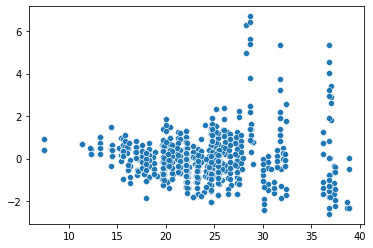

In [54]:
_ = sns.scatterplot(x = Fit_model.fittedvalues, y = Fit_model.resid_pearson)
#the data here is somewhat random but not quite as spread out as is ideal

2) Create a **Histogram** of the residuals using:

```
_ = sns.histplot(model.resid_pearson, kde=True)
```

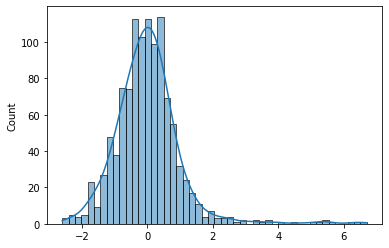

In [49]:
_ = sns.histplot(Fit_model.resid_pearson, kde=True)
#the residuals appear to follow a normal distribution

3) Create a **Normal Probability Plot** (Q-Q Plot) of the residuals with:

```
_ = smapi.qqplot(model.resid_pearson, line='r')
```

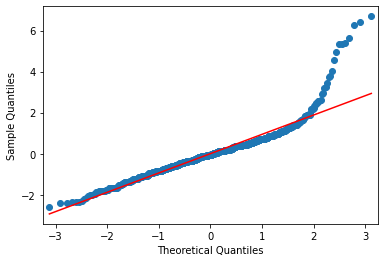

In [55]:
_ = smapi.qqplot(Fit_model.resid_pearson, line='r')
#this plot agrees with the prevoius histogram: the data follows a normal distribution closely until you reach the higher values and then those quantiles significantly deviate from what we would expect with a normal distribution

4) Perform an **Anderson-Darling** test for Normality using:

```
stats.diagnostic.normal_ad(model.resid_pearson)
```

**Reference:**
 
- [STAT 501: 7.5 - Tests for Error Normality](https://online.stat.psu.edu/stat501/lesson/7/7.5)

In [56]:
stats.diagnostic.normal_ad(Fit_model.resid_pearson)
#with the near-zero p-value, we can conclude at 5% confidence that the errors are non-normal

(15.701259024835736, 0.0)

5) Perform a **Breusch-Pagan** test for constant (equal) error variance using:

```
stats.diagnostic.het_breuschpagan(model.resid_pearson, model.model.exog)
```

**References:**
 
- [STAT 501: 7.6 - Tests for Constant Error Variance](https://online.stat.psu.edu/stat501/lesson/7/7.6)
- [How to Perform a Breusch-Pagan Test in Python](https://www.statology.org/breusch-pagan-test-python/)

In [47]:
stats.diagnostic.het_breuschpagan(Fit_model.resid, Fit_model.model.exog)
#F-value = 7.46688415348763
#p-value = 3.1710624546927373e-27
#using the output, we reject the null => there is statistically significant evidence that the variance is not constant with confidence level 5%

(138.6480770785455,
 1.9613774929641403e-25,
 17.46688415348763,
 3.1710624546927373e-27)

6) A **Durbin-Watson** test for autocorrelation is performed by default when fitting an OLS model. To obtain its value, use:

```
stats.stattools.durbin_watson(model.resid_pearson)
```

**Reference:**

- [T.2.3 - Testing and Remedial Measures for Autocorrelation](https://online.stat.psu.edu/stat501/lesson/t/t.2/t.2.3-testing-and-remedial-measures-autocorrelation)

In [57]:
stats.stattools.durbin_watson(Fit_model.resid_pearson)
#there is evidence of autocorrelation

1.0169094932001057

**Summarize**

> *Report the test statistics, p-values, and your descisions about linearity, equal variance, normality, and independence.*

1. **Anderson-Darling Test**: test statistic = 15.70, p-value = 0.0. With the near-zero p-value, we can conclude at 5% confidence that the errors are non-normal. So the Normality condition is violated.
2. **Breusch-Pagan Test**: F-value = 7.47, 
p-value = 3.17e-27. There is statistically significant evidence that the variance is not constant with confidence level 5%. So the equal variance condition is violated.
3. **Durbin-Watson Test**: test statistic = 1.02. At the significance level 0.05, there is evidence of autocorrelation. So the Independence condition is not satisfied. 

## Part 5: Remediation

> *Based on your findings above, suggest remediation steps. If none are needed, explain why.*

**Optional**

- Attempt remediation if necessary.

From our residual analysis, we found that basically every condition was violated so there needs to be some adjustments made before we can meaningfully use this model. For the normality assumption, we did find that most of the data followed the normal distribution up the the larger values. We could potentially subset the data set and satisfy that condition. We could also check the effects of different linear transformations (eg. log) to see the influence on residuals. For the autocorrelation issue, we could experiment with removing one or the others of the correlated predictors to eliminate the issue. This does however reduce the amount of information we are able to put into the model.

## Part 6: Conclusions

> *Provide a summary statement or interpretation of the model relative to its ability to predict fuel economy. Suggest an alternate model to improve performance.*

Overall, our model is ok but it's not great, and shouldn't be considered a terribly reliable prediction tool. Our LINE assumption violations do noticably affect the model's legitimacy. To remedy this and build a better model, we could apply a number of steps: conduct ANOVA tests to evaluate the current predictors and chose only those significant to mitigate the autocorrelation issue, we could apply a log or a box-cox transformation to the model to improve normality. We could also form our model using a more robust method (eg. HuberT) to smooth out some of the underlying issues as well.